# Pytorch WorkFlow

#### What we are Covering

1. Data Prepare and Load
2. Build model
3. Fitting the model to data (Training)
4. Making Predictions and evaluating a model (inference)
5. Save and Reload a model
6. Putting it all together


In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

## 1. Data Prepare and Load

Data can be anything in MAchine LEarning

1.   excel SPreadsheet
2.   Images of any kind
3.   Videos (YouTube has lots of data ...)
4. Audio like songs or podcasts
5. DNA
6. Texts

MAchine LEarning is a game of two parts
1. Get Data in to a numerical representations
2. Build a model to learn patters in that numerical representation,

To showcase this lets create some *Known* data using the linear regression formula.

We will use a linear regression formula to make straight line with *Known* Parameters

In [4]:
num = torch.randn(size = (2,2,2))
print(num.shape)
num2= num.unsqueeze(dim = 1)
print(num2.shape)

torch.Size([2, 2, 2])
torch.Size([2, 1, 2, 2])


In [5]:
# revision
tensor = torch.rand(1)
print(tensor)
tensor2 = torch.randn(1)
print(tensor2)
print(tensor2.dtype)

range_tensor = torch.arange(0,11,2)
print(range_tensor)
print(range_tensor.dtype)
for i in range(len(range_tensor)):
  print(range_tensor[i])


chnged = range_tensor.type(torch.float32)
print(chnged.dtype)


tensor([0.6821])
tensor([-0.9355])
torch.float32
tensor([ 0,  2,  4,  6,  8, 10])
torch.int64
tensor(0)
tensor(2)
tensor(4)
tensor(6)
tensor(8)
tensor(10)
torch.float32


In [6]:
1 # Create Known Parameters
weight = 0.7
bias = 0.3

start = 0
end = 1
steps = 0.02

X = torch.arange(start, end, steps)
X_rs= torch.reshape(X, shape = (len(X), 1))
print(X_rs)
print(X_rs.shape)
Y_ = weight*X_rs + bias
# Adding  some noise
noise =  torch.randn_like(Y_) *.1
Y= Y_ + noise
#print(Y)

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])
torch.Size([50, 1])


In [7]:
len(X), len(Y)

(50, 50)

### Spliting Data in Training and Split

In [8]:
# xreate a train test split

train_split =int(0.8*len(X)) # used as an index
print(train_split)
x_train, y_train = X_rs[:train_split], Y[:train_split]  # First 80% for training
x_test, y_test = X_rs[train_split:], Y[train_split:]    # Last 20% for testing

print("Train size:", len(x_train), len(y_train))
print("Test size:", len(x_test), len(y_test))

40
Train size: 40 40
Test size: 10 10


#### Building a function to visualize the data
Visualzie, visualize


In [9]:
def plot_prediction(train_data = x_train,
                    train_label = y_train,
                    test_data = x_test,
                    test_label = y_test,
                    prediction = None):
  plt.figure(figsize = (10,7))
  #Plot Training data in blue
  plt.scatter(train_data, train_label, c='b', s=4, label = 'Training Data')
  # plot tets data in green
  plt.scatter(test_data, test_label, c = 'g', s= 4, label = 'Test_data')
  if prediction is not None:
    plt.scatter(test_data, prediction, c='r', s= 4, label = 'Prediction')

  plt.legend()

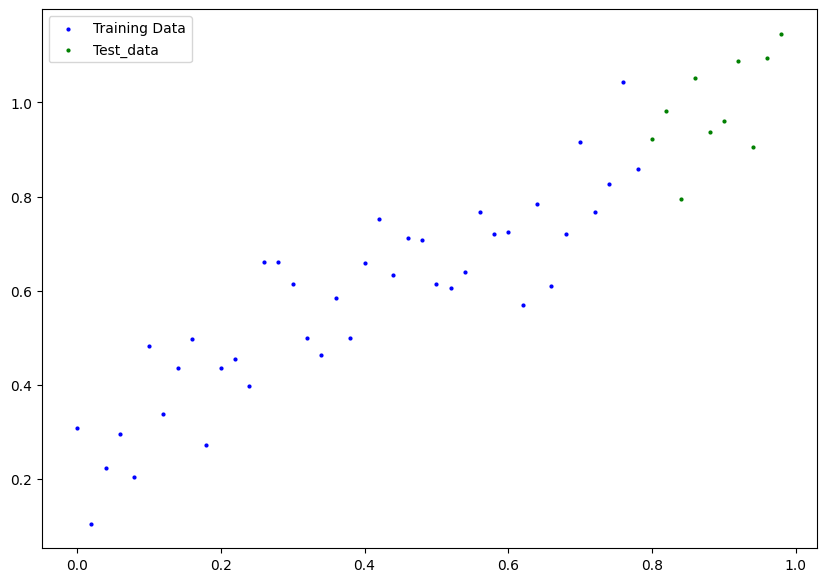

In [10]:
plot_prediction()

#### Building our first PyTorch Model

In [17]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
  #Define weights and bias as learnable parameters(Model Parameters)
    self.weights =nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                        requires_grad=True,
                                        dtype = torch.float))

# forward
  def forward(self,x ):
    return self.weights * x + self.bias

There are two main algorithms to make the parametrs adjust or lrarning:
1. Gradient Descet
2. Back Propagation

### Pytorch Model Building Esentials:
* torch.nn - Cntains all of the buidings for computational graph(Neural Network)
* nn.Parameters - what parameters should our model try and learn, often a PyTorch LAyer from torch.nn will set these for us.
* torch.nnn.Module - the base class for all NN modules
* torch.optim - this where Optimizers live and have gradient descent
* def forward () - All nn.Module subclasses require you to overwrite forward(), this method define what happens in the forward computation.

In [18]:
# random seed : these random values are now deterministic.
torch.manual_seed(42)
# Model Parameters (instance of the model)
model_0 = LinearRegressionModel()

print(list(model_0.parameters()))
# Returns a dictionary containing all the parameters
#and their associated names as key-value pairs.
print(model_0.state_dict())

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


In [20]:
x_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.9232],
         [0.9809],
         [0.7956],
         [1.0517],
         [0.9365],
         [0.9605],
         [1.0882],
         [0.9049],
         [1.0939],
         [1.1459]]))

link: https://www.learnpytorch.io/01_pytorch_workflow/

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


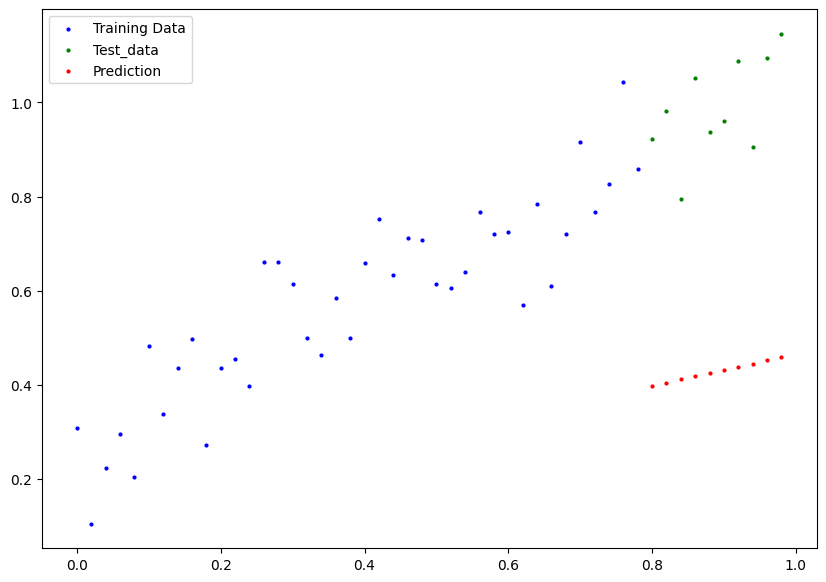

In [23]:
with torch.inference_mode(): #
  y_preds = model_0(x_test)
  print(y_preds)
  plot_prediction(prediction = y_preds)


### Training Our model:
Moving model from unknown parameters to known parameters
1. HOw wrong the momedl prediction are we will use LOSS FUNCTIONS
2. Optimizer: adjust the weights and biases od = fthe model

NOTE: Loss function may be called as cost function

For PyTorch we need
* A Training Loop
* A Testing Loop



In [24]:
model_0.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [27]:
# Set up LOSS Function(MAE)
Loss = nn.L1Loss()
print(Loss(y_preds, y_test))

# Setup Optimizer

optimizer = torch.optim.SGD(params = model_0.parameters(), lr= 0.01)

tensor(0.5597)


#### Training Loop and Testing Loop Building
1. Loop through the data
2. forward Pass(Data moving through our model "forwad")
3. Calculate the Loss(Compareb forwars predictions to ground truth labels)
4. Optimizer Zero Grad
5. Loss Backward- move backward through the network to calculate the gradient of each of the parameters of our model with respect to the loss(**BackPropagation**)
6. Optimizer step- Use the optimizer to adjust our models's parameters to try and improve the loss(**Gradient Descent**)


In [ ]:
# An Epoch is One loop through the Data
epochs = 1

# 1. Loop through the data

for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # Turn on grad

  # 2. Forward Pass
  y_preds = model_0(x_train)

  # 3. Calculate the loss

  loss = Loss(y_preds, y_train)

  # 4. Optimizer zer grad
  optimizer.zero_grad()

  # 5. Perform Backpropagation
  loss.backward()

  # 6. Step the optimizer

  optimizer.step()


  #model_0.eval() # Turns off gradient tracking


In [31]:
for i in range(1):
  print(i)

0


In [ ]:
for epoch in range(epochs):
  y_preds = model_0(x_train)
  loss = Loss(y_preds, y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

In [102]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

torch.Size([50, 1])
tensor([[0.3904],
        [0.6009],
        [0.2566],
        [0.7936],
        [0.9408],
        [0.1332],
        [0.9346],
        [0.5936],
        [0.8694],
        [0.5677],
        [0.7411],
        [0.4294],
        [0.8854],
        [0.5739],
        [0.2666],
        [0.6274],
        [0.2696],
        [0.4414],
        [0.2969],
        [0.8317],
        [0.1053],
        [0.2695],
        [0.3588],
        [0.1994],
        [0.5472],
        [0.0062],
        [0.9516],
        [0.0753],
        [0.8860],
        [0.5832],
        [0.3376],
        [0.8090],
        [0.5779],
        [0.9040],
        [0.5547],
        [0.3423],
        [0.6343],
        [0.3644],
        [0.7104],
        [0.9464],
        [0.7890],
        [0.2814],
        [0.7886],
        [0.5895],
        [0.7539],
        [0.1952],
        [0.0050],
        [0.3068],
        [0.1165],
        [0.9103]])


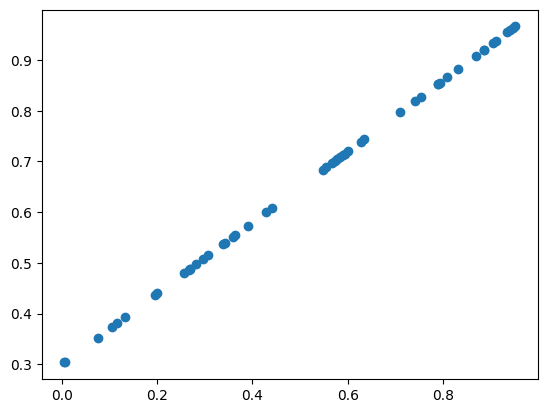

In [103]:
# generating the random data'
w = 0.7
b = 0.3

data = torch.rand(50).unsqueeze(dim=1)
print(data.shape)
print(data)

target = w*data + b

plt.scatter(data, target)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [105]:
# Defining model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1,
                                            requires_grad= True,
                                            dtype= float))
    self.bias = nn.Parameter(torch.rand(1,
                                        requires_grad=True,
                                        dtype=  float))

  def forward(self,x):
    return self.weights * x + self.bias


In [106]:
torch.manual_seed(42)
model = LinearRegressionModel()

In [107]:
model.state_dict()

OrderedDict([('weights', tensor([0.0582], dtype=torch.float64)),
             ('bias', tensor([0.0629], dtype=torch.float64))])

In [108]:
Loss = nn.L1Loss()
optimizer = torch.optim.SGD(params= model.parameters(), lr = 0.01)

In [110]:
epochs = 100

for epoch in range(epochs):
  model.train()
  y_preds = model(X_train)

  loss = Loss(y_preds, y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
print(f' Loss: {loss}')


 Loss: 0.034371061969931546


In [111]:
print(f'Wights: {model.weights.item()} Bias:{model.bias.item()}')

Wights: 0.5512761524508503 Bias:0.38723449174890273


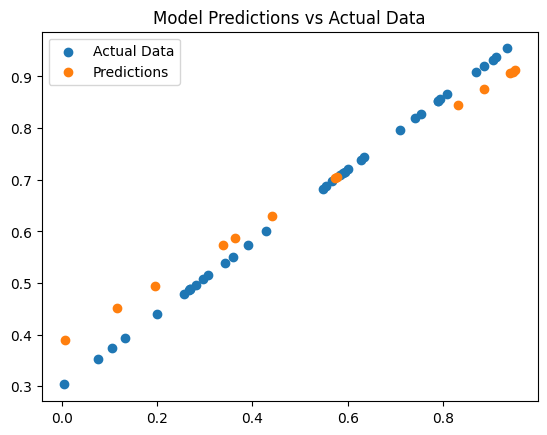

In [112]:
model.eval()
with torch.no_grad():
  y_preds_test = model(X_test)

plt.scatter(X_train, y_train, label="Actual Data")
plt.scatter(X_test, y_preds_test, label="Predictions")
plt.legend()
plt.title("Model Predictions vs Actual Data")
plt.show()